<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/16_2_2_THEORY_CNN_as_feature_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/lfw-dataset")

print("Path to dataset files:", path)

# and then we need to move the folder so it matches the dir that we previously had

# or we can use the sklearn instead -- choose one and fix!!!
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
input_shape = (299, 299)

In [ ]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz
# this link is not working anymore, the kaggle dataset or something else
!tar -xvf /content/lfw-deepfunneled.tgz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0012.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0013.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0014.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0015.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0016.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0017.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0018.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0019.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0020.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0021.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0022.jpg
lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0023.j

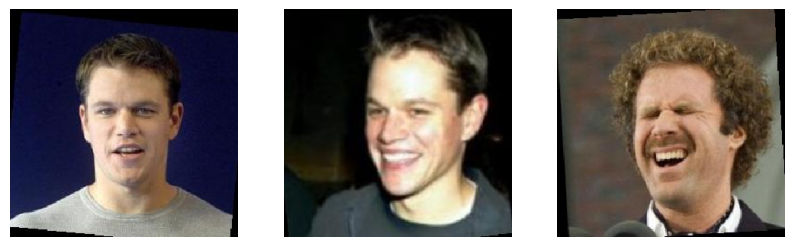

In [ ]:
matt_1 = image.load_img("lfw-deepfunneled/Matt_Damon/Matt_Damon_0001.jpg", target_size=input_shape)
matt_2 = image.load_img("lfw-deepfunneled/Matt_Damon/Matt_Damon_0002.jpg", target_size=input_shape)
will_1 = image.load_img("lfw-deepfunneled/Will_Ferrell/Will_Ferrell_0001.jpg", target_size=input_shape)

loaded_imgs = [matt_1, matt_2, will_1]

plt.figure(figsize=(10, 10))
for i, img in enumerate(loaded_imgs):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(np.asarray(img).astype("uint8"))
    plt.axis("off")

In [ ]:
model = InceptionV3(
    input_shape=input_shape + (3,),
    weights='imagenet',
    include_top=False,
    pooling='avg',
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
x = np.array([image.img_to_array(img) for img in loaded_imgs])
x = preprocess_input(x)
features = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [ ]:
features.shape

(3, 2048)

In [ ]:
print(cosine_similarity(features[0].reshape(1, -1), features[1:]))

[[0.735649  0.6581145]]


In [ ]:
!wget https://www.anred.org/wp-content/uploads/2021/11/trueno-w.jpg

--2024-12-04 21:55:34--  https://www.anred.org/wp-content/uploads/2021/11/trueno-w.jpg
Resolving www.anred.org (www.anred.org)... 91.226.176.137
Connecting to www.anred.org (www.anred.org)|91.226.176.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43971 (43K) [image/jpeg]
Saving to: ‘trueno-w.jpg’

trueno-w.jpg        100%[===================>]  42.94K  --.-KB/s    in 0.03s   

2024-12-04 21:55:35 (1.40 MB/s) - ‘trueno-w.jpg’ saved [43971/43971]



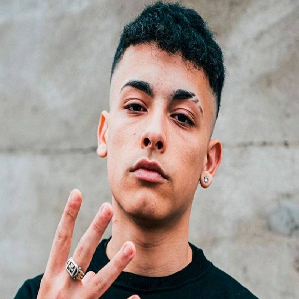

In [ ]:
trueno = image.load_img("trueno-w.jpg", target_size=input_shape)
trueno

In [ ]:
x = image.img_to_array(trueno)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features_trueno = model.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [ ]:
print(cosine_similarity(features_trueno, features))

[[0.5919062  0.5895442  0.55127406]]


In [ ]:
img_labels = []
img_paths = []
for (dirpath, dirnames, filenames) in os.walk("lfw-deepfunneled"):
    for file_name in filenames:
        # Get full path to the file
        file_full_path = os.path.join(dirpath, file_name)
        img_paths.append(file_full_path)

        # Get person name for the given image
        name = " ".join(file_name.split("_")[:-1])
        img_labels.append(name)


batch_size = 128
img_features = []
for i in tqdm(range(0, len(img_paths), batch_size)):
    batch_paths = img_paths[i:i + batch_size]
    batch_imgs = [
        image.load_img(img_path, target_size=input_shape)
        for img_path in batch_paths
    ]
    x = np.array([image.img_to_array(img) for img in batch_imgs])
    x = preprocess_input(x)

    batch_features = model.predict(x, batch_size=batch_size)
    img_features.extend(list(batch_features))

img_features = np.asarray(img_features)
img_labels = np.asarray(img_labels)
img_paths = np.asarray(img_paths)

img_features.shape, img_labels.shape, img_paths.shape

  0%|          | 0/104 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

((13233, 2048), (13233,), (13233,))

In [ ]:
%%time
sim = cosine_similarity(features_trueno, img_features)[0]
sim_argsort = np.argsort(sim)[::-1]


CPU times: user 80.7 ms, sys: 25.9 ms, total: 107 ms
Wall time: 98 ms


In [ ]:
for i in range(5):
    label = img_labels[sim_argsort[i]]
    similarity = sim[sim_argsort[i]]
    print(f"- Matched subject '{label}' with similarity {similarity:.4f}")


- Matched subject 'Robert Gallo' with similarity 0.7350
- Matched subject 'Alexandra Rozovskaya' with similarity 0.7312
- Matched subject 'Brad Miller' with similarity 0.7250
- Matched subject 'Winona Ryder' with similarity 0.7238
- Matched subject 'Jennifer Lopez' with similarity 0.7220


In [ ]:
!wget -O "george.jpeg" "https://cloudfront-us-east-1.images.arcpublishing.com/infobae/XW4S75Y7IBECTEY25SZYHZU76A.jpeg"

--2024-12-04 21:58:33--  https://cloudfront-us-east-1.images.arcpublishing.com/infobae/XW4S75Y7IBECTEY25SZYHZU76A.jpeg
Resolving cloudfront-us-east-1.images.arcpublishing.com (cloudfront-us-east-1.images.arcpublishing.com)... 13.227.219.97, 13.227.219.57, 13.227.219.65, ...
Connecting to cloudfront-us-east-1.images.arcpublishing.com (cloudfront-us-east-1.images.arcpublishing.com)|13.227.219.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 698750 (682K) [image/jpeg]
Saving to: ‘george.jpeg’

george.jpeg         100%[===================>] 682.37K  1.47MB/s    in 0.5s    

2024-12-04 21:58:34 (1.47 MB/s) - ‘george.jpeg’ saved [698750/698750]



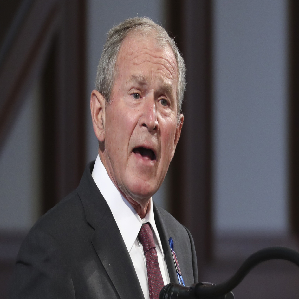

In [ ]:
george = image.load_img("george.jpeg", target_size=input_shape)
george

In [ ]:
x = image.img_to_array(george)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features_george = model.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
%%time
sim = cosine_similarity(features_george, img_features)[0]
sim_argsort = np.argsort(sim)[::-1]


CPU times: user 86.7 ms, sys: 21.9 ms, total: 109 ms
Wall time: 98.6 ms


In [ ]:
img_paths[sim_argsort[i]]

'lfw-deepfunneled/Sean_OKeefe/Sean_OKeefe_0002.jpg'

In [ ]:
for i in range(10):
    label = img_labels[sim_argsort[i]]
    similarity = sim[sim_argsort[i]]
    print(f"- Matched subject '{label}' with similarity {similarity:.4f}")


- Matched subject 'Goran Persson' with similarity 0.8318
- Matched subject 'Martin Frost' with similarity 0.8289
- Matched subject 'Spike Helmick' with similarity 0.8262
- Matched subject 'George W Bush' with similarity 0.8223
- Matched subject 'Sean OKeefe' with similarity 0.8208
- Matched subject 'Donald Rumsfeld' with similarity 0.8201
- Matched subject 'George W Bush' with similarity 0.8169
- Matched subject 'George W Bush' with similarity 0.8166
- Matched subject 'Jean Chretien' with similarity 0.8151
- Matched subject 'George W Bush' with similarity 0.8149
